Connecting to Google Drive and extracting subset content:

In [ ]:
from google.colab import drive
import zipfile
import os
drive.mount('/content/drive')
zip_path = '/content/drive/MyDrive/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset.zip'
extract_dir = '/content/Dataset505_BraTS2020_subset'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Files extracted to:", extract_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Files extracted to: /content/Dataset505_BraTS2020_subset


Verifying folder content:

In [ ]:
import os
for root, dirs, files in os.walk(extract_dir):
    level = root.replace(extract_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    for f in files:
        print(f"{indent}  {f}")

Dataset505_BraTS2020_subset/
  Dataset505_BraTS2020_subset/
    labelsTr/
      BraTS20_Training_195.nii
      BraTS20_Training_151.nii
      BraTS20_Training_283.nii
      BraTS20_Training_303.nii
      BraTS20_Training_058.nii
      BraTS20_Training_259.nii
      BraTS20_Training_360.nii
      BraTS20_Training_175.nii
      BraTS20_Training_236.nii
      BraTS20_Training_013.nii
      BraTS20_Training_339.nii
      BraTS20_Training_149.nii
      BraTS20_Training_302.nii
      BraTS20_Training_120.nii
      BraTS20_Training_184.nii
      BraTS20_Training_112.nii
      BraTS20_Training_036.nii
      BraTS20_Training_344.nii
      BraTS20_Training_017.nii
      BraTS20_Training_358.nii
      BraTS20_Training_045.nii
      BraTS20_Training_113.nii
      BraTS20_Training_194.nii
      BraTS20_Training_143.nii
      BraTS20_Training_217.nii
      BraTS20_Training_111.nii
      BraTS20_Training_050.nii
      BraTS20_Training_080.nii
      BraTS20_Training_048.nii
      BraTS20_Training_115.

In [ ]:
import json
import os
subset_path = '/content/Dataset505_BraTS2020_subset/Dataset505_BraTS2020_subset'
imagesTr_path = os.path.join(subset_path, 'imagesTr')
labelsTr_path = os.path.join(subset_path, 'labelsTr')
training_cases = sorted([f for f in os.listdir(imagesTr_path) if f.endswith('_0000.nii')])
training_ids = [f.replace('_0000.nii', '') for f in training_cases]
training_list = [
    {
        "image": f"./imagesTr/{case_id}_0000.nii",
        "label": f"./labelsTr/{case_id}.nii"
    }
    for case_id in training_ids
]
dataset_dict = {
    "name": "BraTS2020_subset",
    "description": "20% subset of BraTS2020 for testing nnUNet setup",
    "tensorImageSize": "3D",
    "reference": "BraTS 2020",
    "licence": "CC-BY-SA 4.0",
    "release": "0.1",
    "modality": {
        "0": "MRI"
    },
    "labels": {
        "0": "background",
        "1": "edema",
        "2": "non-enhancing tumor",
        "3": "enhancing tumor"
    },
    "numTraining": len(training_list),
    "numTest": 0,
    "training": training_list,
    "test": []
}
json_path = os.path.join(subset_path, 'dataset.json')
with open(json_path, 'w') as f:
    json.dump(dataset_dict, f, indent=4)

print(f"✅ dataset.json generated in: {json_path}")

✅ dataset.json generated in: /content/Dataset505_BraTS2020_subset/Dataset505_BraTS2020_subset/dataset.json


nnUNet setup.

In [ ]:
!pip install -U pip setuptools wheel
!git clone https://github.com/MIC-DKFZ/nnUNet.git
%cd nnUNet
!pip install -e .

fatal: destination path 'nnUNet' already exists and is not an empty directory.
/content/nnUNet
Obtaining file:///content/nnUNet
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 153.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 159.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━

In [ ]:
import os
os.environ['nnUNet_raw'] = '/content/nnUNet_raw_data_base/nnUNet_raw_data'
os.environ['nnUNet_preprocessed'] = '/content/nnUNet_preprocessed'
os.environ['RESULTS_FOLDER'] = '/content/nnUNet_results'
os.makedirs(os.environ['nnUNet_raw'], exist_ok=True)
os.makedirs(os.environ['nnUNet_preprocessed'], exist_ok=True)
os.makedirs(os.environ['RESULTS_FOLDER'], exist_ok=True)

In [ ]:
!cp -r /content/Dataset505_BraTS2020_subset/Dataset505_BraTS2020_subset /content/nnUNet_raw_data_base/nnUNet_raw_data/

In [ ]:
import os
import numpy as np
import nibabel as nib

labelsTr_path = '/content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset/labelsTr'
files = [f for f in os.listdir(labelsTr_path) if f.endswith('.nii')]

for f in files:
    path = os.path.join(labelsTr_path, f)
    img = nib.load(path)
    data = img.get_fdata()
    data[data == 4] = 3
    new_img = nib.Nifti1Image(data.astype(np.uint8), img.affine, img.header)
    nib.save(new_img, path)

print("Remapeamento das labels concluído.")

Remapeamento das labels concluído.


In [ ]:
import os
import json
dataset_path = "/content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset"
dataset_json_path = os.path.join(dataset_path, "dataset.json")
imagesTr_path = os.path.join(dataset_path, "imagesTr")
prefixes = set()
for f in os.listdir(imagesTr_path):
    if f.endswith(".nii"):
        prefix = "_".join(f.split("_")[:-1])
        prefixes.add(prefix)

num_training_cases = len(prefixes)

dataset_json = {
    "channel_names": {
        "0": "flair",
        "1": "t1",
        "2": "t1ce",
        "3": "t2"
    },
    "labels": {
        "background": "0",
        "edema": "1",
        "non-enhancing tumor": "2",
        "enhancing tumor": "3"
    },
    "numTraining": num_training_cases,
    "file_ending": ".nii"
}

with open(dataset_json_path, "w") as f:
    json.dump(dataset_json, f, indent=4)

print(f"✅ dataset.json corrigido e salvo com {num_training_cases} casos de treino.")

✅ dataset.json corrigido e salvo com 73 casos de treino.


In [ ]:
!nnUNetv2_plan_and_preprocess -d 505 --verify_dataset_integrity

nnUNet_results is not defined and nnU-Net cannot be used for training or inference. If this is not intended behavior, please read documentation/setting_up_paths.md for information on how to set this up.
Fingerprint extraction...
Dataset505_BraTS2020_subset
Using <class 'nnunetv2.imageio.nibabel_reader_writer.NibabelIO'> as reader/writer
nnUNet_results is not defined and nnU-Net cannot be used for training or inference. If this is not intended behavior, please read documentation/setting_up_paths.md for information on how to set this up.
nnUNet_results is not defined and nnU-Net cannot be used for training or inference. If this is not intended behavior, please read documentation/setting_up_paths.md for information on how to set this up.
nnUNet_results is not defined and nnU-Net cannot be used for training or inference. If this is not intended behavior, please read documentation/setting_up_paths.md for information on how to set this up.
nnUNet_results is not defined and nnU-Net cannot be 

In [ ]:
import os
os.environ['nnUNet_results'] = '/content/nnUNet_results'
os.environ['OMP_NUM_THREADS'] = '4'
os.environ['MKL_NUM_THREADS'] = '4'
os.environ['NUMEXPR_NUM_THREADS'] = '4'

In [ ]:
!nnUNetv2_train 505 3d_fullres 0


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-06-03 17:58:47.010936: Using torch.compile...
2025-06-03 17:58:48.842610: do_dummy_2d_data_aug: False
2025-06-03 17:58:48.843096: Creating new 5-fold cross-validation split...
2025-06-03 17:58:48.844595: Desired fold for training: 0
2025-06-03 17:58:48.844684: This split has 58 training and

In [ ]:
from google.colab import drive
import subprocess
import os

drive.mount('/content/drive')

dirs_to_save = ['/content/nnUNet_results', '/content/nnUNet_preprocessed']

for d in dirs_to_save:
    if os.path.exists(d):
        base_name = os.path.basename(d)
        zip_file = f"{base_name}.zip"
        print(f"Compactando {d}...")
        subprocess.run(['zip', '-r', zip_file, d], check=True)
        print(f"Movendo {zip_file} para o Google Drive...")
        subprocess.run(['mv', zip_file, '/content/drive/MyDrive/'], check=True)
        print(f"{zip_file} salvo no Google Drive com sucesso.\n")
    else:
        print(f"Atenção: diretório {d} não encontrado, pulando...\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Compactando /content/nnUNet_results...
Movendo nnUNet_results.zip para o Google Drive...
nnUNet_results.zip salvo no Google Drive com sucesso.

Compactando /content/nnUNet_preprocessed...
Movendo nnUNet_preprocessed.zip para o Google Drive...
nnUNet_preprocessed.zip salvo no Google Drive com sucesso.



In [ ]:
!nnUNetv2_train 505 3d_fullres 0 --c


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-06-04 00:06:38.771962: Using torch.compile...
2025-06-04 00:06:40.256532: do_dummy_2d_data_aug: False
2025-06-04 00:06:40.257070: Using splits from existing split file: /content/nnUNet_preprocessed/Dataset505_BraTS2020_subset/splits_final.json
2025-06-04 00:06:40.257287: The split file cont

In [ ]:
!nnUNetv2_predict \
  -i /content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset/imagesTs \
  -o /content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset/predictions \
  -d 505 \
  -c 3d_fullres \
  -f 0 \
  -chk checkpoint_best.pth


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 73 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 73 cases that I would like to predict

Predicting Case_004:
perform_everything_on_device: True
100% 8/8 [00:02<00:00,  3.39it/s]
sending off prediction to background worker for resampling and export
done with Case_004

Predicting Case_013:
perform_everything_on_device: True
100% 8/8 [00:01<00:00,  5.66it/s]
sending off prediction to background worker for resampling and export
done with Case_013

Predicting Case_014:
perform_everything_on_device: True
100% 8/8 [00:01<

In [ ]:
%%bash
cd /content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset/predictions

for f in Case_*.nii; do
  num=$(echo $f | sed -E 's/Case_0*([0-9]+).nii/\1/')
  mv "$f" "BraTS20_Training_$(printf "%03d" $num).nii"
done

In [ ]:
!nnUNetv2_evaluate_folder \
  /content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset/labelsTs \
  /content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset/predictions \
  -djfile /content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset/dataset.json \
  -pfile /content/nnUNet_results/Dataset505_BraTS2020_subset/nnUNetTrainer__nnUNetPlans__3d_fullres/plans.json

Using <class 'nnunetv2.imageio.nibabel_reader_writer.NibabelIO'> as reader/writer


In [ ]:
import json

with open('/content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset/predictions/summary.json') as f:
    resultados = json.load(f)

print(resultados)

{'foreground_mean': {'Dice': 0.8488251764120704, 'FN': 3376.694063926941, 'FP': 2171.5570776255704, 'IoU': 0.764798809907585, 'TN': 8894658.92694064, 'TP': 27792.82191780822, 'n_pred': 29964.378995433788, 'n_ref': 31169.515981735163}, 'mean': {'1': {'Dice': 0.8092949812615524, 'FN': 2397.1369863013697, 'FP': 1930.6027397260275, 'IoU': 0.7143914586308906, 'TN': 8902885.698630137, 'TP': 20786.561643835616, 'n_pred': 22717.164383561645, 'n_ref': 23183.698630136987}, '2': {'Dice': 0.8595220153513294, 'FN': 6020.86301369863, 'FP': 3205.041095890411, 'IoU': 0.7790597716175176, 'TN': 8872478.205479452, 'TP': 46295.890410958906, 'n_pred': 49500.931506849316, 'n_ref': 52316.75342465754}, '3': {'Dice': 0.8776585326233297, 'FN': 1712.0821917808219, 'FP': 1379.027397260274, 'IoU': 0.8009451994743466, 'TN': 8908612.87671233, 'TP': 16296.013698630137, 'n_pred': 17675.04109589041, 'n_ref': 18008.095890410958}}, 'metric_per_case': [{'metrics': {'1': {'Dice': 0.8708151893992602, 'FN': 1603, 'FP': 1156,

🎯 MÉTRICAS MÉDIAS POR CLASSE


,Classe,Dice,FN,FP,IoU,TN,TP,n_pred,n_ref
0,1,0.809295,2397.136986,1930.602740,0.714391,8.902886e+06,20786.561644,22717.164384,23183.698630
1,2,0.859522,6020.863014,3205.041096,0.779060,8.872478e+06,46295.890411,49500.931507,52316.753425
2,3,0.877659,1712.082192,1379.027397,0.800945,8.908613e+06,16296.013699,17675.041096,18008.095890


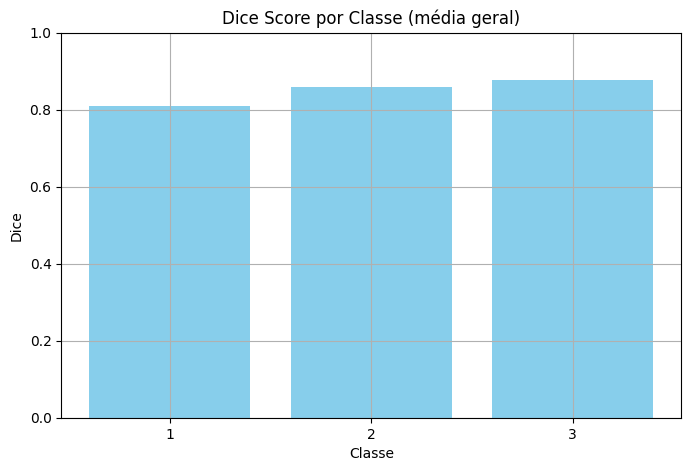

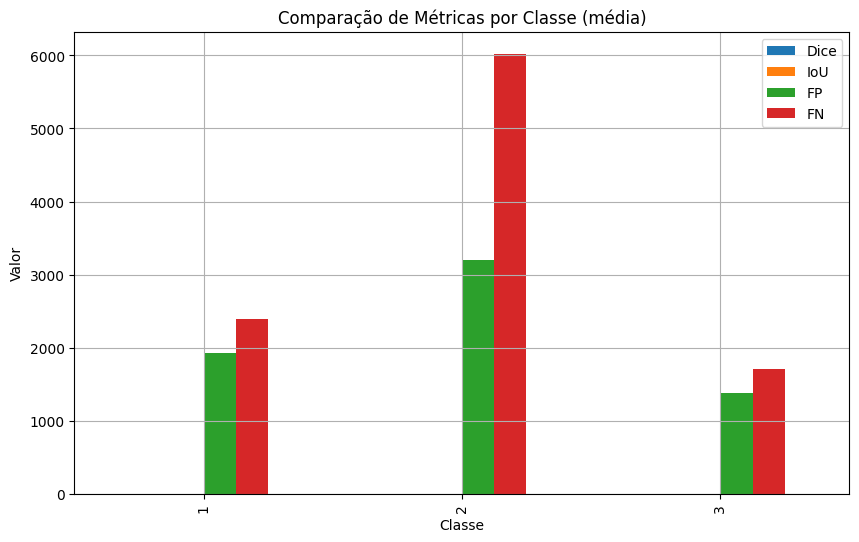


💥 PIOR CASO DETECTADO: BraTS20_Training_303.nii
Média de Dice: 0.3704


,Classe,Dice,FN,FP,IoU,TN,TP,n_pred,n_ref
0,1,0.370531,17552,3928,0.227394,8900198,6322,10250,23874
1,2,0.528759,3386,9567,0.359397,8907780,7267,16834,10653
2,3,0.212019,1167,0,0.118580,8926676,157,157,1324


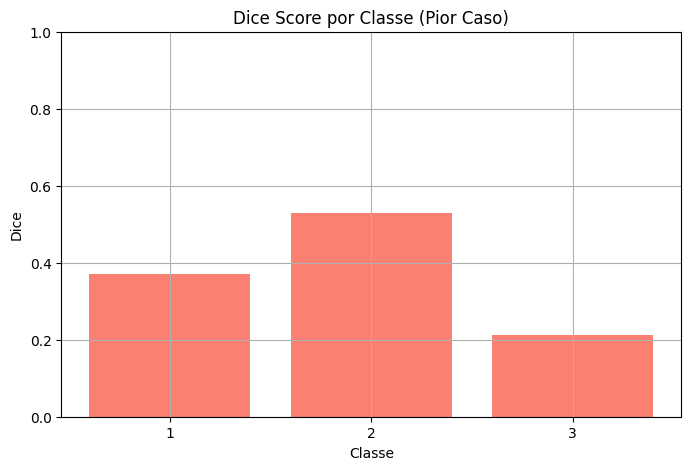

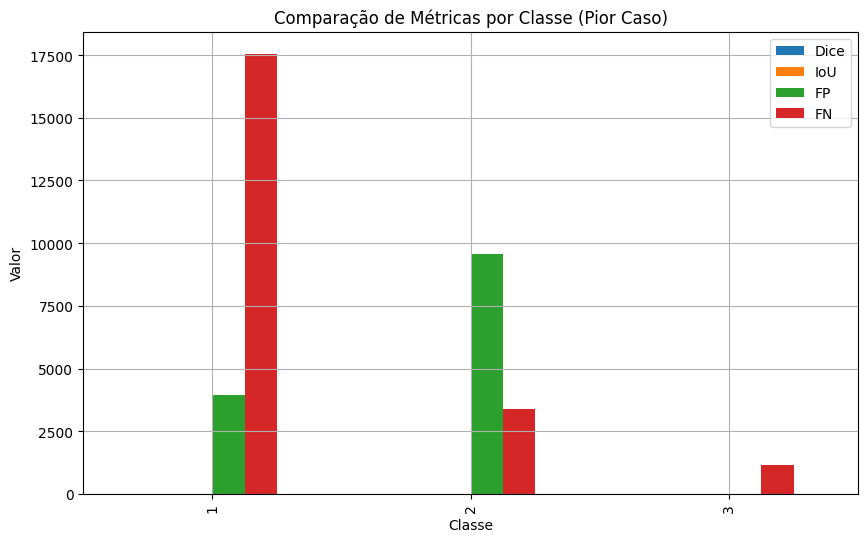

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

json_path = "/content/nnUNet_raw_data_base/nnUNet_raw_data/Dataset505_BraTS2020_subset/predictions/summary.json"

with open(json_path) as f:
    summary = json.load(f)

mean_metrics = summary["mean"]
df_mean = pd.DataFrame.from_dict(mean_metrics, orient="index")
df_mean.index.name = "Classe"
df_mean.reset_index(inplace=True)

print("MÉTRICAS MÉDIAS POR CLASSE")
display(df_mean)

plt.figure(figsize=(8, 5))
plt.bar(df_mean['Classe'].astype(str), df_mean['Dice'], color='skyblue')
plt.title("Dice Score por Classe (média geral)")
plt.xlabel("Classe")
plt.ylabel("Dice")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

df_mean[["Classe", "Dice", "IoU", "FP", "FN"]].set_index("Classe").plot(
    kind="bar",
    figsize=(10, 6),
    title="Comparação de Métricas por Classe (média)"
)
plt.ylabel("Valor")
plt.grid(True)
plt.show()

worst_case = None
worst_case_mean_dice = float("inf")

for case in summary["metric_per_case"]:
    metrics = case["metrics"]
    mean_dice = sum(m["Dice"] for m in metrics.values()) / len(metrics)
    if mean_dice < worst_case_mean_dice:
        worst_case_mean_dice = mean_dice
        worst_case = case

df_worst = pd.DataFrame.from_dict(worst_case["metrics"], orient="index")
df_worst.index.name = "Classe"
df_worst.reset_index(inplace=True)

print(f"\nPIOR CASO DETECTADO: {worst_case['prediction_file'].split('/')[-1]}")
print(f"Média de Dice: {worst_case_mean_dice:.4f}")
display(df_worst)
plt.figure(figsize=(8, 5))
plt.bar(df_worst['Classe'].astype(str), df_worst['Dice'], color='salmon')
plt.title("Dice Score por Classe (Pior Caso)")
plt.xlabel("Classe")
plt.ylabel("Dice")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

df_worst[["Classe", "Dice", "IoU", "FP", "FN"]].set_index("Classe").plot(
    kind="bar",
    figsize=(10, 6),
    title="Comparação de Métricas por Classe (Pior Caso)"
)
plt.ylabel("Valor")
plt.grid(True)
plt.show()